## Main Steps:-
1. Look at the Big picture
2. Get the Data
3. Explore and visulize the data to gain insights
4. Prepare the data for machine learning alogrithms
5. Select a model and Train it
6. Fine Tune your model
7. Present your Solution
8. Launch, monitor and maintain your system

### First Task
#### Use California census data to build a modell of housing prices in the State

**Pipelines** 
* A sequence of data processsing components is called a data pipeline.
* Pipelines are very common in machine learning systems, since there is a lot of daata manupulation and amny data transformation to apply.

### Selecting what king of supervision the model will need?
##### Here we are clearly going to use univearate regression model as we are going to predict only one value.
##### Now there is no continuous flow of data and the data is small as well so we will use batch learning insted of online

### Select a performance measure
##### 1. Root Mean Square Error(RMSE) :- It is generally preferred performance measure regression tasks.
##### 2. Mean Absolute error :- In case of many outliers you can use MAE to meassure performance of the task.

### Downloading Data

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
def load_housing_data():
   tarball_path = Path("datasets/housing.tgz")
   if not tarball_path.is_file():
       Path("datasets").mkdir(parents=True, exist_ok=True)
       url = "https://github.com/ageron/data/raw/main/housing.tgz"
       urllib.request.urlretrieve(url, tarball_path)
       with tarfile.open(tarball_path) as housing_tarball:
           housing_tarball.extractall(path="datasets")
   return pd.read_csv(Path("datasets/housing/housing.csv"))
housing = load_housing_data()

C:\Users\pande\AppData\Local\Temp\ipykernel_19692\71249269.py:12: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tarball.extractall(path="datasets")


When load_housing_data() is called, it looks for the datasets/housing.tgz file.If it does not find it, it creates the datasets directory inside the current directory, downloads the housing.tgz file from the ageron/data GitHub repository, and extracts its content into the datasets directory; this creates the datasets/housing directory with the housing.csv file inside it. Lastly, the function loads this CSV file into a Pandas DataFrame object containing all the data, and returns it

### Let's analyze the data

In [2]:
#importing important libraries
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Checkout the snape of data
housing.shape

(20640, 10)

In [4]:
# Lets take a quick look at the Data Structure
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [5]:
# Quick description of data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# Finding existing categories using only catogerical column ocean_proximity
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
#Summery of numerical attributes
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

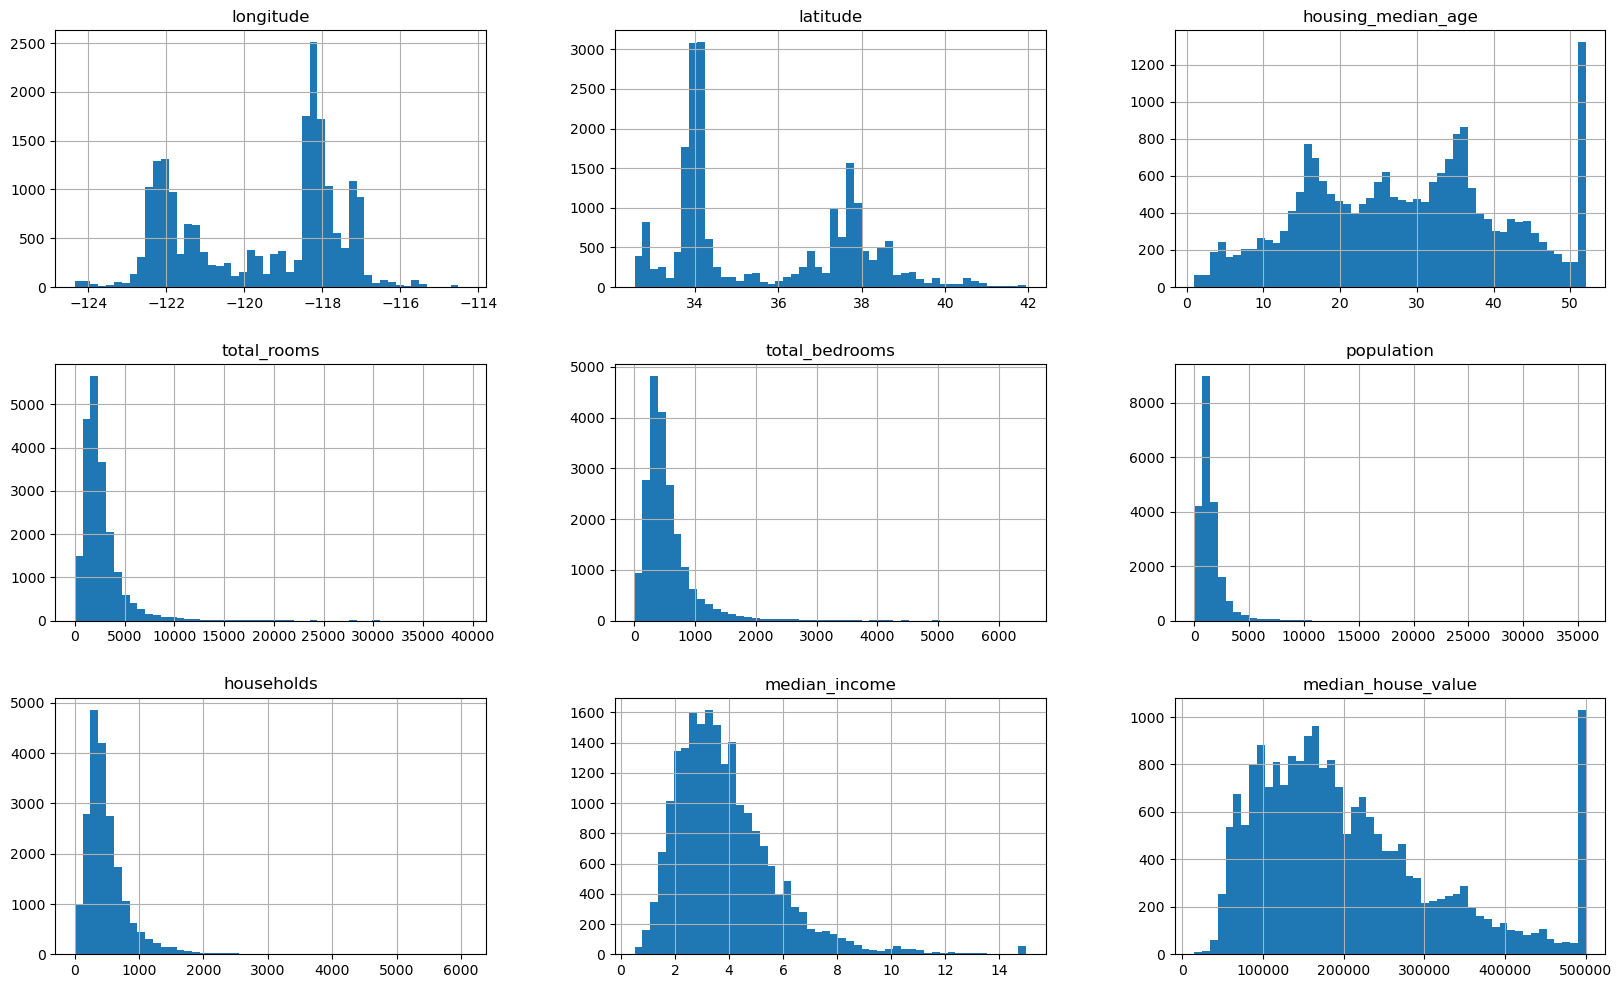

In [8]:
# Analyzing nnumerical columns using histogram
housing.hist(bins=50, figsize =(20,12))
plt.show()

**Insites :** Many histograms are skewed right: they extend much farther to the right of the median than to the left. This may make it a bit harder for some machine learning algorithms to detect patterns. So will try transforming these attributes to have more symmetrical and bell-shaped distributions.

## Create a Test Set
* It may seem strange to voluntarily set aside part of the data at this stage. After all, you have only taken a quick glance at the data, and surely you should learn a whole lot more about it before you decide what algorithms to use. This is true, but your brain is an amazing pattern detection system, which also means that it is highly prone to overfitting: if you look at the test set, you may stumble upon some seemingly interesting pattern in the test data that leads you to select a particular kind of machine learning model. 

* When you estimate the generalization error using the test set, your estimate will be too optimistic, and you will launch a system that will not perform as well as expected. This is called **data snooping bias**.

In [9]:
def shuffle_and_split_data(data, test_ratio):
    # Generate a random permutation of indices (0 to len(data)-1)
    # This shuffles the order of rows randomly
    shuffled_indices = np.random.permutation(len(data))

    # Calculate how many rows should go into the test set
    test_set_size = int(len(data) * test_ratio)

    # Select the first 'test_set_size' indices as test data
    test_indices = shuffled_indices[:test_set_size]

    # The remaining indices are used for the training data
    train_indices = shuffled_indices[test_set_size:]

    # Return two DataFrames: training set and test set
    # iloc[...] is used to select rows by integer indices
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
# Call the function 'shuffle_and_split_data' to split the housing dataset
# Arguments:
#   housing     -> the full dataset (Pandas DataFrame)
#   0.2         -> test ratio (20% of the data will go into the test set)

train_set, test_set = shuffle_and_split_data(housing, 0.2)

# After this line:
#   - 'train_set' will contain 80% of the rows (usd for training the ML model)
#   - 'test_set' will contain 20% of the rows (used for evaluating the model)


In [11]:
len(train_set)

16512

In [12]:
len(test_set)

4128

* This works, but it is not perfect: if you run the program again, it will generate a different test set, Over time, you (or your machine learning algorithms) will get to see the whole dataset, which is what you want to avoid.
* To have a stable train/test split even after updating the dataset, a common solution is to use each instance’s identifier to decide whether or not it should go in the test set (assuming instances have unique and immutable identifiers). For example, you could compute a hash of each instance’s identifier and put that instance in the test set if the hash is lower than or equal to 20% of the maximum hash value. This ensures that the test set will remain consistent across multiple runs, even if you refresh the dataset. The new test set will contain 20% of the new instances, but it will not contain any instance that was previously in the training set.

In [13]:
from zlib import crc32   # Import crc32 (Cyclic Redundancy Check) hash function from zlib module

def is_id_in_test_set(identifier, test_ratio):
    # Convert the identifier (like a row ID) into a 64-bit integer and pass it to crc32
    # crc32 creates a hash value (integer between 0 and 2^32 - 1)
    # We compare this hash with test_ratio * 2^32
    # If the hash is smaller, we assign this identifier to the test set
    return crc32(np.int64(identifier)) < test_ratio * 2**32


def split_data_with_id_hash(data, test_ratio, id_column):
    # Extract the ID column from the dataset (used for stable splitting)
    ids = data[id_column]

    # Apply the hashing function 'is_id_in_test_set' to each ID
    # This creates a Boolean mask (True if goes to test set, False if train)
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))

    # Rows NOT in test_set (False) -> training set
    # Rows IN test_set (True) -> test set
    return data.loc[~in_test_set], data.loc[in_test_set]

In [14]:
housing_with_id = housing.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

If you use the row index as a unique identifier, you need to make sure that new data gets appended to the end of the dataset and that no row ever gets deleted. If this is not possible, then you can try to use the most stable features to build a unique identifier. For example, a district’s latitude and longitude are guaranteed to be stable for a few million years, so you could combine them into an ID like so:

In [15]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways. The simplest function is train_test_split(), which does pretty much the same thing as the shuffle_and_split_data() function we defined earlier, with a couple of additional features. First, there is a random_state parameter that allows you to set the random generator seed. Second, you can pass it multiple datasets with an identical number of rows, and it will split them on the same indices (this is very useful, for example, if you have a separate DataFrame for labels):

In [16]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [17]:
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])

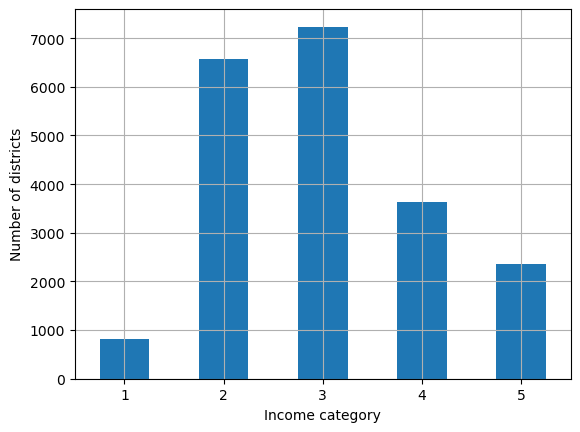

In [18]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

**Insights:** Most median income values are clustered around 1.5 to 6 (i.e., $15,000 and $60,000), but some median incomes go far beyond 6.

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [20]:
strat_train_set, strat_test_set = strat_splits[0]

In [21]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [22]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [23]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Explore and Visualize the Data to Gain Insights

In [24]:
housing = strat_train_set.copy()

#### Visualizing Geographical Data

The dataset includes geographical information (latitude and longitude), it is a good idea to create a scatterplot of all the districts to
visualize the data.

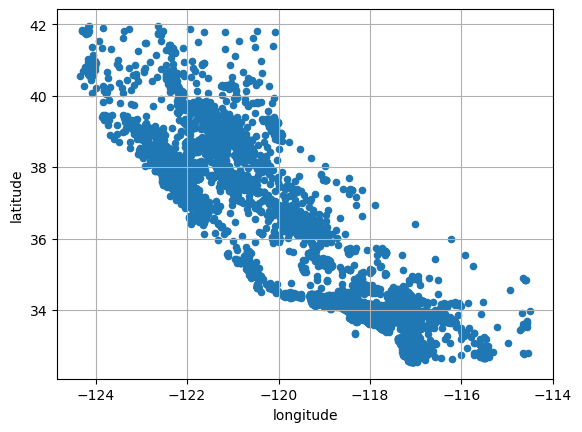

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

This looks like California all right, but other than that it is hard to see any particular pattern. Setting the alpha option to 0.2 makes it much easier to visualize the places where there is a high density of data points 

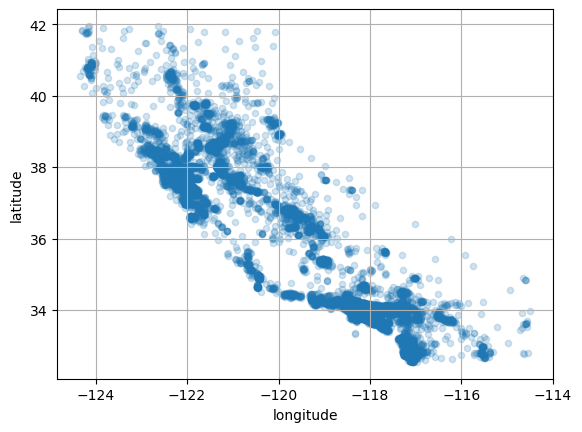

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

**Insights** The high-density areas are the Bay Area and around Los Angeles and San Diego, plus a long line of fairly high-density areas in the Central Valley

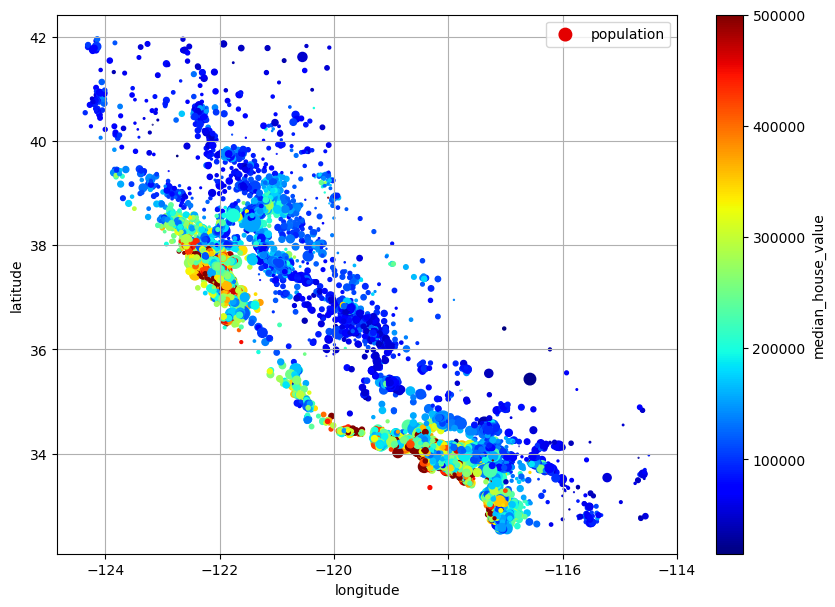

In [27]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,s=housing["population"] / 100, label="population", c="median_house_value", cmap="jet", colorbar=True,
legend=True, sharex=False, figsize=(10, 7))
plt.show()

**Insights**
* The radius of each circle represents the district’s population (option s), and the color represents the price (option c). Here you use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices).
* This image tells you that the housing prices are very much related to the location (e.g., close to the ocean) 

#### Correlations

In [28]:
corr_matrix = housing.corr(numeric_only=True)

In [29]:
corr_matrix

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924213           -0.102937     0.044558   
latitude            -0.924213  1.000000            0.005692    -0.036753   
housing_median_age  -0.102937  0.005692            1.000000    -0.361710   
total_rooms          0.044558 -0.036753           -0.361710     1.000000   
total_bedrooms       0.068210 -0.066391           -0.317978     0.930076   
population           0.104236 -0.115677           -0.301906     0.863967   
households           0.054261 -0.071604           -0.300075     0.916143   
median_income       -0.016542 -0.078137           -0.127043     0.197720   
median_house_value  -0.050859 -0.139584            0.102175     0.137455   

                    total_bedrooms  population  households  median_income  \
longitude                 0.068210    0.104236    0.054261      -0.016542   
latitude                 -0.066391   -0.115677   -0.071604      -0.078137   
housing_median_age       -0.317978   -0.301906   -0.300075      -0.127043   
total_rooms               0.930076    0.863967    0.916143       0.197720   
total_bedrooms            1.000000    0.886200    0.978822      -0.006038   
population                0.886200    1.000000    0.916237       0.004282   
households                0.978822    0.916237    1.000000       0.013637   
median_income            -0.006038    0.004282    0.013637       1.000000   
median_house_value        0.054635   -0.020153    0.071426       0.688380   

                    median_house_value  
longitude                    -0.050859  
latitude                     -0.139584  
housing_median_age            0.102175  
total_rooms                   0.137455  
total_bedrooms                0.054635  
population                   -0.020153  
households                    0.071426  
median_income                 0.688380  
median_house_value            1.000000

In [30]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

* The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north). Finally, coefficients close to 0 mean that there is no linear correlation.
 
Another way to check for correlation between attributes is to use the **Pandas scatter_matrix() function**, which plots every numerical attribute against every other numerical attribute.

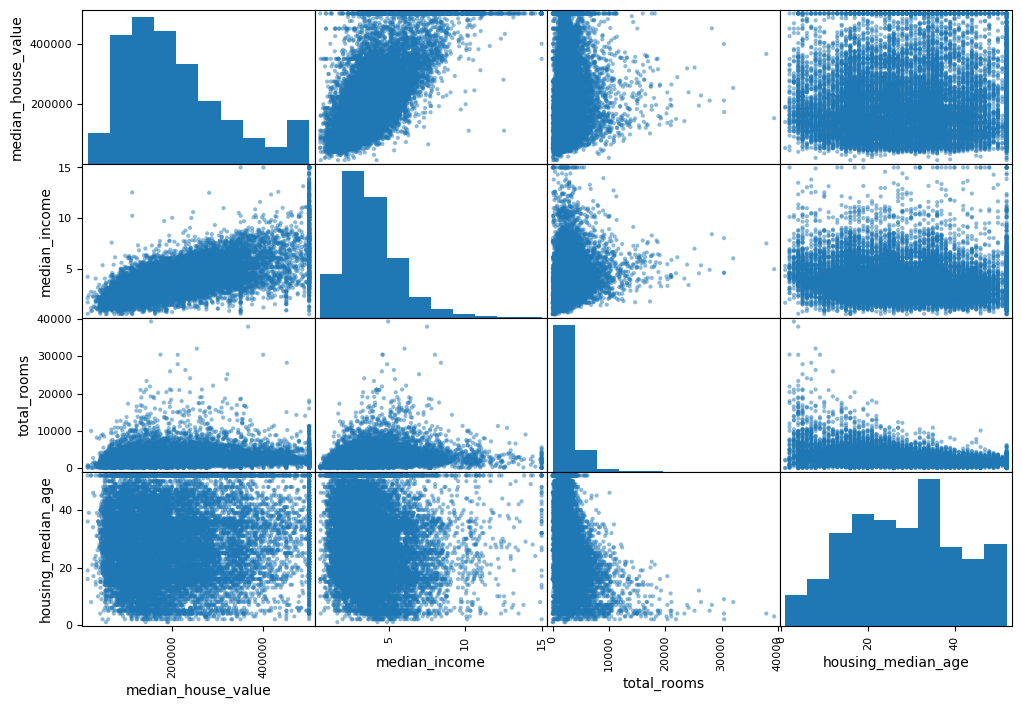

In [31]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

**Insights** Looking at the correlation scatterplots, it seems like the most promising attribute to predict the median house value is the **median income**, so you
zoom in on their scatterplot 

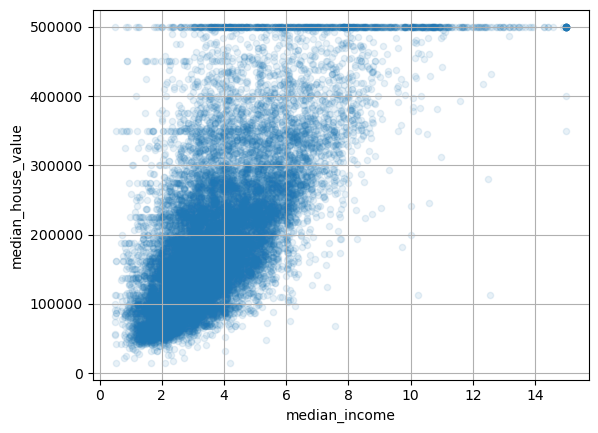

In [32]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1, grid=True)
plt.show()

**Insights** 
* This plot reveals a few things. First, the correlation is indeed quite strong; you can clearly see the upward trend, and the points are not too dispersed. 
* The price cap you noticed earlier is clearly visible as a horizontal line at 500,000.

* The plot also reveals other less obvious straight lines a horizontal line around 450,000 another around 350,000 perhaps one around 280,000.

#### Experiment with Attribute Combinations

The total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms. And the population per household also seems like an interesting attribute combination to look at. You create these new attributes as follows:

In [33]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [34]:
corr_matrix = housing.corr(numeric_only = True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

* The new bedrooms_ratio attribute is much more correlated with the median house value than the total number of rooms or bedrooms.

### Prepare the Data for Machine Learning Algorithms

In [35]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [36]:
#Cleaning data

median = housing["total_bedrooms"].median()
housing["total_bedrooms"] = housing["total_bedrooms"].fillna(median)

**Scikit-Learn class: SimpleImputer.** The benefit is that it will store the median value of each feature: this will make it possible to impute missing values not only on the training set, but also on the validation set, the test set, and any new data fed to the model. To use it, first you need to create a SimpleImputer instance, specifying that you want to replace each attribute’s missing values with the median of that attribute:

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Since the median can only be computed on numerical attributes, you then need to create a copy of the data with only the numerical attributes (this will exclude the text attribute ocean_proximity):

In [38]:
housing_num = housing.select_dtypes(include=[np.number])

In [39]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the result in its statistics_ instance variable. Only the total_bedrooms
attribute had missing values, but you cannot be sure that there won’t be any missing values in new data after the system goes live, so it is safer to apply the imputer to all the numerical attributes:

In [40]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [41]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

Now you can use this “trained” imputer to transform the training set by replacing missing values with the learned medians

In [42]:
X = imputer.transform(housing_num)

Missing values can also be replaced with the mean value (strategy="mean"), or with the most frequent value (strategy="most_frequent"), or with a constant value (strategy="constant", fill_value=…). The last two strategies support non-numerical data.

In [43]:
X

array([[-1.2242e+02,  3.7800e+01,  5.2000e+01, ...,  1.5760e+03,
         1.0340e+03,  2.0987e+00],
       [-1.1838e+02,  3.4140e+01,  4.0000e+01, ...,  6.6600e+02,
         3.5700e+02,  6.0876e+00],
       [-1.2198e+02,  3.8360e+01,  3.3000e+01, ...,  5.6200e+02,
         2.0300e+02,  2.4330e+00],
       ...,
       [-1.1706e+02,  3.2590e+01,  1.3000e+01, ...,  2.8140e+03,
         7.6000e+02,  4.0616e+00],
       [-1.1840e+02,  3.4060e+01,  3.7000e+01, ...,  1.7250e+03,
         8.3800e+02,  4.1455e+00],
       [-1.2241e+02,  3.7660e+01,  4.4000e+01, ...,  6.8200e+02,
         2.1200e+02,  3.2833e+00]])

Output of imputer.transform(housing_num) is a NumPy array: X has neither column names nor index. Luckily, it’s not too hard to wrap X in a DataFrame and recover the column names and index from housing_num:

In [44]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,index=housing_num.index)

In [45]:
housing_tr

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096    -122.42     37.80                52.0       3321.0          1115.0   
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   
...          ...       ...                 ...          ...             ...   
14207    -118.40     33.86                41.0       2237.0           597.0   
13105    -119.31     36.32                23.0       2945.0           592.0   
19301    -117.06     32.59                13.0       3920.0           775.0   
19121    -118.40     34.06                37.0       3781.0           873.0   
19888    -122.41     37.66                44.0        431.0           195.0   

       population  households  median_income  
13096      1576.0      1034.0         2.0987  
14973       666.0       357.0         6.0876  
3785        562.0       203.0         2.4330  
14689      1845.0       780.0         2.2618  
20507      1912.0      1172.0         3.5292  
...           ...         ...            ...  
14207       938.0       523.0         4.7105  
13105      1419.0       532.0         2.5733  
19301      2814.0       760.0         4.0616  
19121      1725.0       838.0         4.1455  
19888       682.0       212.0         3.2833  

[16512 rows x 8 columns]

#### Handling Text and Categorical Attributes

In [46]:
housing_cat = housing[["ocean_proximity"]]

In [47]:
housing_cat

ocean_proximity
13096        NEAR BAY
14973       <1H OCEAN
3785           INLAND
14689          INLAND
20507      NEAR OCEAN
...               ...
14207       <1H OCEAN
13105          INLAND
19301      NEAR OCEAN
19121       <1H OCEAN
19888      NEAR OCEAN

[16512 rows x 1 columns]

It’s not arbitrary text: there are a limited number of possible values, each of which represents a category. So this attribute is a categorical attribute. Most machine learning algorithms prefer to work with numbers, so let’s convert these categories from text to numbers. For this, we can use Scikit-Learn’s OrdinalEncoder class:

In [48]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [49]:
housing_cat_encoded

array([[3.],
       [0.],
       [1.],
       ...,
       [4.],
       [0.],
       [4.]])

You can get the list of categories using the categories_ instance variable.

In [50]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for ordered categories such as “bad”, “average”, “good”, and “excellent”), but it is obviously not the case for the ocean_proximit column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1). To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is " <1H OCEAN" (and 0 otherwise), another attribute equal to 1 when the category is "INLAND" (and 0 otherwise), and so on. **This is called one-hot encoding**, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are sometimes called **dummy attributes**. Scikit-Learn provides a OneHotEncoder class to convert categorical values into one-hot vectors:

In [51]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [52]:
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

When a categorical attribute has hundreds or thousands of categories, one-hot encoding it results in a very large matrix full of 0s except for a single 1 per row. In this case, a sparse matrix is exactly what you needit will save plenty of memory and speed up computations. You can use a sparse matrix mostly like a normal 2D array,⁠ but if you want to convert it to a (dense) NumPy array, just call the toarray() method:

In [53]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

As with the **OrdinalEncoder**, you can get the list of categories using the encoder’s categories_ instance variable:

In [54]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Pandas has a function called **get_dummies()**, which also converts each categorical feature into a one-hot representation, with one binary feature per category:

In [55]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

ocean_proximity_INLAND  ocean_proximity_NEAR BAY
0                    True                     False
1                   False                      True

In [56]:
cat_encoder.transform(df_test)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2 stored elements and shape (2, 5)>

get_dummies() saw only two categories, so it output two columns, whereas OneHotEncoder output one column per learned category, in the right order. Moreover, if you feed get_dummies() a DataFrame containing an unknown category (e.g., "<2H OCEAN"), it will happily generate a column for it:

In [57]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

ocean_proximity_<2H OCEAN  ocean_proximity_ISLAND
0                       True                   False
1                      False                    True

In [58]:
cat_encoder.handle_unknown = "ignore"

In [59]:
cat_encoder.transform(df_test_unknown)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1 stored elements and shape (2, 5)>

When you fit any Scikit-Learn estimator using a DataFrame, the estimator stores the column names in the feature_names_in_ attribute. Scikit-Learn then ensures that any DataFrame fed to this estimator after that (e.g., to transform() or predict()) has the same column names. Transformers also provide a get_feature_names_out() method that you can use to build a DataFrame around the transformer’s output:

In [60]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [61]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [62]:
df_output = pd.DataFrame(
    cat_encoder.transform(df_test_unknown).toarray(),   # Convert sparse matrix to dense if needed
    columns=cat_encoder.get_feature_names_out(),
    index=df_test_unknown.index
)

In [63]:
df_output

ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     1.0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                       0.0                         0.0  
1                       0.0                         0.0

### Feature Scaling and Transformation

* One of the most important transformations you need to apply to your data is feature scaling.

* There are two common ways to get all attributes to have the same scale: min max scaling and standardization

**Min-max scaling (many people call this normalization)** is the simplest: for each attribute, the values are shifted and rescaled so that they end up ranging from 0 to 1. This is performed by subtracting the min value and dividing by the difference between the min and the max. Scikit-Learn provides a transformer called MinMaxScaler for this. It has a feature_range hyperparameter that lets you change the range if, for some reason, you don’t want 0–1 (e.g., neural networks work best with zero-mean inputs, so a range of –1 to 1 is preferable). 

In [64]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [65]:
housing_num_min_max_scaled

array([[-0.60851927,  0.11702128,  1.        , ..., -0.80701754,
        -0.61433638, -0.7794789 ],
       [ 0.21095335, -0.66170213,  0.52941176, ..., -0.91866029,
        -0.86708979, -0.22929339],
       [-0.51926978,  0.23617021,  0.25490196, ..., -0.93141946,
        -0.92458466, -0.73336919],
       ...,
       [ 0.47870183, -0.99148936, -0.52941176, ..., -0.65513434,
        -0.71663244, -0.50873781],
       [ 0.20689655, -0.6787234 ,  0.41176471, ..., -0.78873758,
        -0.68751167, -0.49716556],
       [-0.60649087,  0.08723404,  0.68627451, ..., -0.91669734,
        -0.92122457, -0.61608805]])

**Standardization** is different: first it subtracts the mean value (so standardized values have a zero mean), then it divides the result by the standard deviation (so standardized values have a standard deviation equal to 1). Unlike min max scaling, standardization does not restrict values to a specific range.

In [66]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [67]:
housing_num_std_scaled

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.13746004,
         1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, ..., -0.69377062,
        -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.78876841,
        -0.77572662, -0.75978881],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  1.26829911,
         0.67913534,  0.1010487 ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.27356264,
         0.88286825,  0.14539615],
       [-1.41803793,  0.94797769,  1.22545939, ..., -0.67915557,
        -0.75221898, -0.31034135]])

When a feature’s distribution has a heavy tail (i.e., when values far from the mean are not exponentially rare), both min-max scaling and standardization will squash most values into a small range.

Using **Scikit-Learn’s rbf_kernel() function**, you can create a new **Gaussian RBF** feature measuring the similarity between the housing
 median age and 35:

In [68]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

In [69]:
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

Now lets move to the model LinearRegression

In [70]:
# Import Linear Regression model from scikit-learn
from sklearn.linear_model import LinearRegression  

# Import StandardScaler for scaling the target variable
from sklearn.preprocessing import StandardScaler  

# Step 1: Initialize a scaler to normalize the target values (housing_labels)
target_scaler = StandardScaler()

# Step 2: Scale the target values (housing_labels is converted into a 2D array using .to_frame())
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

# Step 3: Initialize a Linear Regression model
model = LinearRegression()

# Step 4: Train (fit) the model using 'median_income' as the feature and the scaled_labels as the target
model.fit(housing[["median_income"]], scaled_labels)

# Step 5: Take a few rows of 'median_income' as new test data (pretend this is unseen data)
some_new_data = housing[["median_income"]].iloc[:5]

# Step 6: Predict scaled target values using the trained model
scaled_predictions = model.predict(some_new_data)

# Step 7: Convert the scaled predictions back to original scale using inverse_transform
predictions = target_scaler.inverse_transform(scaled_predictions)

# Final result: 'predictions' contains the target values in the original scale


This works fine, but a simpler option is to use a **TransformedTargetRegressor**. We just need to construct it, giving it the regression model and the label transformer, then fit it on the training set, using the original unscaled labels. It will automatically use the transformer to scale the labels and train the regression model on the resulting scaled labels, just like we did previously. Then, when we want to make a prediction, it will call the regression model’s predict() method and use the scaler’s inverse_transform() method to produce the prediction:

In [71]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression

# Step 1: Create a Linear Regression model wrapped inside TransformedTargetRegressor
# - The 'regressor' is LinearRegression()
# - The 'transformer' is StandardScaler(), which will scale the target variable (y)
model = TransformedTargetRegressor(
    regressor=LinearRegression(),     # the regression model
    transformer=StandardScaler()      # scales the target values
)

# Step 2: Train (fit) the model
# - Features: only 'median_income' column from housing dataset
# - Target: housing_labels (original target values, not scaled by you)
# Note: Scaling of target will be handled internally by the wrapper
model.fit(housing[["median_income"]], housing_labels)

# Step 3: Use the trained model to make predictions
# - Here we use the first 5 rows of 'median_income' as new/unseen data
predictions = model.predict(some_new_data)

#  Final Result:
# - Internally, the model trained on scaled target values
# - Predictions are automatically inverse-transformed back to the original scale


#### Custom Transformers

For transformations that don’t require any training, you can just write a function that takes a NumPy array as input and outputs the transformed array.

In [72]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

Your transformation function can take hyperparameters as additional
 arguments. For example, here’s how to create a transformer that computes the
 same Gaussian RBF similarity measure as earlier:

In [74]:
rbf_transformer = FunctionTransformer(rbf_kernel,
kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

 Note that there’s no inverse function for the RBF kernel, since there are
 always two values at a given distance from a fixed point (except at distance
 0). Also note that rbf_kernel() does not treat the features separately. If you
 pass it an array with two features, it will measure the 2D distance (Euclidean)
 to measure similarity.

In [75]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

In [76]:
sf_simil

array([[0.999927  ],
       [0.05258419],
       [0.94864161],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]])

 Custom transformers are also useful to combine features. For example, here’s
 a FunctionTransformer that computes the ratio between the input features 0
 and 1:

In [77]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

 FunctionTransformer is very handy, but what if you would like your
 transformer to be trainable, learning some parameters in the fit() method and
 using them later in the transform() method? For this, you need to write a
 custom class. Scikit-Learn relies on duck typing, so this class does not have
 to inherit from any particular base class. All it needs is three methods: fit()
 (which must return self), transform(), and fit_transform().

 You can get fit_transform() for free by simply adding TransformerMixin as a
 base class: the default implementation will just call fit() and then transform().
 If you add BaseEstimator as a base class (and avoid using *args and
 **kwargs in your constructor), you will also get two extra methods:
 get_params() and set_params(). These will be useful for automatic
 hyperparameter tuning.


Below is the example

In [78]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
class StandardScalerClone(BaseEstimator, TransformerMixin):
   def __init__(self, with_mean=True):  # no *args or **kwargs!
       self.with_mean = with_mean
   def fit(self, X, y=None):  # y is required even though we don't use it
       X = check_array(X)  # checks that X is an array with finite float values
       self.mean_ = X.mean(axis=0)
       self.scale_ = X.std(axis=0)
       self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
       return self  # always return self!
   def transform(self, X):
       check_is_fitted(self)  # looks for learned attributes (with trailing _)
       X = check_array(X)
       assert self.n_features_in_ == X.shape[1]
       if self.with_mean:
           X = X - self.mean_
       return X / self.scale_

A custom transformer can (and often does) use other estimators in its
 implementation. 

In [79]:
from sklearn.cluster import KMeans
class ClusterSimilarity(BaseEstimator, TransformerMixin):
   def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
      self.n_clusters = n_clusters
      self.gamma = gamma
      self.random_state = random_state
   def fit(self, X, y=None, sample_weight=None):
       self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
       self.kmeans_.fit(X, sample_weight=sample_weight)
       return self  # always return self!
   def transform(self, X):
       return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
   def get_feature_names_out(self, names=None):
       return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [80]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],sample_weight=housing_labels)

In [81]:
similarities

array([[7.76542973e-17, 9.79800335e-01, 5.48714294e-08, ...,
        5.54756787e-01, 4.68660945e-14, 5.60181642e-01],
       [6.44368278e-01, 4.37928334e-13, 1.10563200e-01, ...,
        3.94562487e-17, 9.91430580e-01, 2.65430691e-10],
       [3.31752344e-17, 6.54513501e-01, 1.07069766e-08, ...,
        5.85660788e-01, 1.56121793e-14, 2.76994463e-01],
       ...,
       [1.20915228e-01, 2.94626804e-24, 8.21082019e-06, ...,
        9.05126434e-30, 2.27911432e-02, 2.57216447e-20],
       [6.54529515e-01, 2.83886458e-13, 1.06085724e-01, ...,
        2.31193217e-17, 9.95505588e-01, 1.85273211e-10],
       [2.52428219e-16, 9.68456695e-01, 1.35198859e-07, ...,
        4.42577246e-01, 1.42097447e-13, 6.51045403e-01]])

This code creates a ClusterSimilarity transformer, setting the number of
 clusters to 10. Then it calls fit_transform() with the latitude and longitude of
 every district in the training set, weighting each district by its median house
 value. The transformer uses k-means to locate the clusters, then measures the
 Gaussian RBF similarity between each district and all 10 cluster centers. The
 result is a matrix with one row per district, and one column per cluster. Let’s
 look at the first three rows, rounding to two decimal places:

In [82]:
similarities[:3].round(2)

array([[0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.13, 0.55, 0.  , 0.56],
       [0.64, 0.  , 0.11, 0.04, 0.  , 0.  , 0.  , 0.  , 0.99, 0.  ],
       [0.  , 0.65, 0.  , 0.  , 0.01, 0.  , 0.49, 0.59, 0.  , 0.28]])

This shows the 8 cluster centers found by k-means. The districts are
 colored according to their geographic similarity to their closest cluster center.
 As you can see, most clusters are located in highly populated and expensive
 areas

### Transformation Pipelines

As you can see, there are many data transformation steps that need to be
 executed in the right order. Fortunately, Scikit-Learn provides the Pipeline
 class to help with such sequences of transformations. Here is a small pipeline
 for numerical attributes, which will first impute then scale the input features:

In [83]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

 The Pipeline constructor takes a list of name/estimator pairs (2-tuples)
 defining a sequence of steps. The names can be anything you like, as long as
 they are unique and don’t contain double underscores (__). They will be
 useful later, when we discuss hyperparameter tuning. The estimators must all
 be transformers (i.e., they must have a fit_transform() method), except for the
 last one, which can be anything: a transformer, a predictor, or any other type
 of estimator.

 If you don’t want to name the transformers, you can use the make_pipeline()
 function instead; it takes transformers as positional arguments and creates a
 Pipeline using the names of the transformers’ classes, in lowercase and
 without underscores (e.g., "simpleimputer"):

In [84]:
from sklearn.pipeline import make_pipeline

# Create a numerical pipeline using make_pipeline
num_pipeline = make_pipeline(
    
    # Step 1: Handle missing values by replacing them with the median
    SimpleImputer(strategy="median"),
    
    # Step 2: Standardize numerical features 
    # (scale them to mean = 0 and standard deviation = 1)
    StandardScaler()
)

 When you call the pipeline’s fit() method, it calls fit_transform() sequentially
 on all the transformers, passing the output of each call as the parameter to the
 next call until it reaches the final estimator, for which it just calls the fit()
 method.

 If you call the pipeline’s transform() method, it
 will sequentially apply all the transformations to the data. If the last estimator
 were a predictor instead of a transformer, then the pipeline would have a
 predict() method rather than a transform() method. Calling it would
 sequentially apply all the transformations to the data and pass the result to the
 predictor’s predict() method

In [85]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

if you want to recover a nice DataFrame, you can use the
 pipeline’s get_feature_names_out() method:

In [86]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, columns=num_pipeline.get_feature_names_out(),index=housing_num.index)
df_housing_num_prepared.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13096  -1.423037  1.013606            1.861119     0.311912        1.368167   
14973   0.596394 -0.702103            0.907630    -0.308620       -0.435925   
3785   -1.203098  1.276119            0.351428    -0.712240       -0.760709   
14689   1.231216 -0.884924           -0.919891     0.702262        0.742306   
20507   0.711362 -0.875549            0.589800     0.790125        1.595753   

       population  households  median_income  
13096    0.137460    1.394812      -0.936491  
14973   -0.693771   -0.373485       1.171942  
3785    -0.788768   -0.775727      -0.759789  
14689    0.383175    0.731375      -0.850281  
20507    0.444376    1.755263      -0.180365

 Pipelines support indexing; for example, pipeline[1] returns the second
 estimator in the pipeline, and pipeline[:-1] returns a Pipeline object
 containing all but the last estimator. 

So far, we have handled the categorical columns and the numerical columns
 separately. It would be more convenient to have a single transformer capable
 of handling all columns, applying the appropriate transformations to each
 column. For this, you can use a ColumnTransformer. For example, the
 following **ColumnTransformer** will apply num_pipeline (the one we just
 defined) to the numerical attributes and cat_pipeline to the categorical
 attribute:

In [87]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

 First we import the ColumnTransformer class, then we define the list of
 numerical and categorical column names and construct a simple pipeline for
 categorical attributes. Lastly, we construct a ColumnTransformer. Its
 constructor requires a list of triplets (3-tuples), each containing a name
 (which must be unique and not contain double underscores), a transformer,
 and a list of names (or indices) of columns that the transformer should be
 applied to

Since listing all the column names is not very convenient, Scikit-Learn
 provides a make_column_selector() function that returns a selector function
 you can use to automatically select all the features of a given type, such as
 numerical or categorical. You can pass this selector function to the
 ColumnTransformer instead of column names or indices. Moreover, if you
 don’t care about naming the transformers, you can use
 make_column_transformer(), which chooses the names for you, just like
 make_pipeline() does. For example, the following code creates the same
 ColumnTransformer as earlier, except the transformers are automatically
 named "pipeline-1" and "pipeline-2" instead of "num" and "cat":

In [88]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [89]:
#Now apply this ColumnTransformer to the housing data:

housing_prepared = preprocessing.fit_transform(housing)

In [90]:
#  shows that we can get a DataFrame out if we want
housing_prepared_fr = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=housing.index)
housing_prepared_fr.head(2)

pipeline-1__longitude  pipeline-1__latitude  \
13096              -1.423037              1.013606   
14973               0.596394             -0.702103   

       pipeline-1__housing_median_age  pipeline-1__total_rooms  \
13096                        1.861119                 0.311912   
14973                        0.907630                -0.308620   

       pipeline-1__total_bedrooms  pipeline-1__population  \
13096                    1.368167                0.137460   
14973                   -0.435925               -0.693771   

       pipeline-1__households  pipeline-1__median_income  \
13096                1.394812                  -0.936491   
14973               -0.373485                   1.171942   

       pipeline-2__ocean_proximity_<1H OCEAN  \
13096                                    0.0   
14973                                    1.0   

       pipeline-2__ocean_proximity_INLAND  pipeline-2__ocean_proximity_ISLAND  \
13096                                 0.0                                 0.0   
14973                                 0.0                                 0.0   

       pipeline-2__ocean_proximity_NEAR BAY  \
13096                                   1.0   
14973                                   0.0   

       pipeline-2__ocean_proximity_NEAR OCEAN  
13096                                     0.0  
14973                                     0.0

#### builds the single pipeline to do all of this should look familiar to you by now:

In [91]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

#### If you run this ColumnTransformer, it performs all the transformations and outputs a NumPy array with 24 features:

In [92]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [93]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

## Select and Train a Model

#### Train and Evaluate on the Training Set

We will use **LinearRegression** model

In [94]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000019E67223250>)])),
                ('linearregression', LinearRegression())])

 Let's try it out on the training set, looking at the first five predictions and comparing them to the
 labels:

In [95]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred

array([246000., 372700., 135700.,  91400., 330900.])

In [96]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [97]:
#  – computes the error ratios discussed in the book
error_ratios = housing_predictions[:5].round(-2) / housing_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-46.3%, -23.0%, 33.4%, -4.9%, -8.5%


**Warning:** In recent versions of Scikit-Learn, you must use root_mean_squared_error(labels, predictions) to compute the RMSE, instead of mean_squared_error(labels, predictions, squared=False). The following try/except block tries to import root_mean_squared_error, and if it fails it just defines it.

**Insighets** It works, but not always: the first prediction is way off (by over
 $200,000!), while the other predictions are better: two are off by about 25%,
 and two are off by less than 10%. 

### Now lets check RMSE

In [98]:
try:
    from sklearn.metrics import root_mean_squared_error
except ImportError:
    from sklearn.metrics import mean_squared_error

    def root_mean_squared_error(labels, predictions):
        return mean_squared_error(labels, predictions, squared=False)

lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)
lin_rmse

68972.88910758475

This is better than nothing, but clearly not a great score: the
 median_housing_values of most districts range between 120,000 and 265,000, so a typical prediction error of 68,628 is really not very
satisfying. 

This is an example of a model underfitting the training data. 

 Now let's try a **DecisionTreeRegressor**, as this is a fairly powerful model
 capable of finding complex nonlinear relationships in the data

In [99]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x000...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000019E67223250>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

Let's Evalute again

In [100]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = root_mean_squared_error(housing_labels, housing_predictions)
tree_rmse

0.0

No error at all? Could this model really be absolutely perfect?
 Of course, it is much more likely that the model has badly **overfit** the data.
 How can you be sure? As you saw earlier, you don’t want to touch the test set
 until you are ready to launch a model you are confident about, so you need to
 use part of the training set for training and part of it for model validation.


### Better Evaluation Using Cross-Validation

One way to evaluate the decision tree model would be to use the train_
 test_split() function to split the training set into a smaller training set and a
 validation set, then train your models against the smaller training set and
 evaluate them against the validation set. It’s a bit of effort, but nothing too
 difficult, and it would work fairly well.
 A great alternative is to use Scikit-Learn’s k_-fold cross-validation feature.
 The following code randomly splits the training set into 10 nonoverlapping
 subsets called folds, then it trains and evaluates the decision tree model 10
 times, picking a different fold for evaluation every time and using the other 9
 folds for training. The result is an array containing the 10 evaluation scores:

In [101]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,scoring="neg_root_mean_squared_error", cv=10)

In [102]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     66551.139927
std       1110.386369
min      64607.896046
25%      66157.004240
50%      66308.879467
75%      66826.257468
max      68532.210664
dtype: float64

Now the decision tree doesn’t look as good as it did earlier. In fact, it seems
 to perform almost as poorly as the linear regression model! Notice that cross
validation allows you to get not only an estimate of the performance of your
 model, but also a measure of how precise this estimate is (i.e., its standard
 deviation). The decision tree has an RMSE of about 66,868, with a standard
 deviation of about 2,061. You would not have this information if you just
 used one validation set. But cross-validation comes at the cost of training the
 model several times, so it is not always feasible.

In [103]:
#  – computes the error stats for the linear model
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count       10.000000
mean     70005.608228
std       4184.181111
min      65504.765753
25%      68174.168583
50%      68745.549757
75%      70347.617459
max      81044.631296
dtype: float64

#### Let’s try one last model now: the RandomForestRegressor.

 Random forests work by training many decision trees on random
 subsets of the features, then averaging out their predictions. Such models
 composed of many other models are called ensembles: they are capable of
 boosting the performance of the underlying model (in this case, decision
 trees). 

In [104]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [105]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47052.156858
std       1014.215773
min      45495.976649
25%      46569.493712
50%      47117.033226
75%      47480.519175
max      49155.369239
dtype: float64

In [106]:
forest_reg.fit(housing, housing_labels)
housing_predictions = forest_reg.predict(housing)
forest_rmse = root_mean_squared_error(housing_labels, housing_predictions)
forest_rmse

17551.2122500877

This is much better: random forests really look very promising for this task.

### Fine-Tune Your Model

#### Grid Search
* One option would be to fiddle with the hyperparameters manually, until you find a great combination of hyperparameter values. This would be very tedious work, and you may not have time to explore many combinations.

* Instead, you can use Scikit-Learn’s GridSearchCV class to search for you.


* All you need to do is tell it which hyperparameters you want it to experiment with and what values to try out, and it will use cross-validation to evaluate all the possible combinations of hyperparameter values.

* For example, the code searches for the best combination of hyperparameter values for the RandomForestRegressor:

In [107]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x0000019E67223250>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [108]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

 The evaluation scores are available using grid_search.cv_results_. This is a
 dictionary, but if you wrap it in a DataFrame you get a nice list of all the test
 scores for each combination of hyperparameters and for each cross-validation
 split, as well as the mean test score across all splits:

In [109]:
# shows part of the output of get_params().keys()
print(str(full_pipeline.get_params().keys())[:1000] + "...")

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__force_int_remainder_cols', 'preprocessing__n_jobs', 'preprocessing__remainder__memory', 'preprocessing__remainder__steps', 'preprocessing__remainder__transform_input', 'preprocessing__remainder__verbose', 'preprocessing__remainder__simpleimputer', 'preprocessing__remainder__standardscaler', 'preprocessing__remainder__simpleimputer__add_indicator', 'preprocessing__remainder__simpleimputer__copy', 'preprocessing__remainder__simpleimputer__fill_value', 'preprocessing__remainder__simpleimputer__keep_empty_features', 'preprocessing__remainder__simpleimputer__missing_values', 'preprocessing__remainder__simpleimputer__strategy', 'preprocessing__remainder__standardscaler__copy', 'preprocessing__remainder__standardscaler__with_mean', 'preprocessing__remainder__standardscaler__with_std', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 

In [110]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x0000019...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000019E672E6330>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

In [111]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

#  – these few lines of code just make the DataFrame look nicer
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

n_clusters  max_features  split0  split1  split2  mean_test_rmse
12          15             6   42735   43708   44395           43613
13          15             8   43549   43820   44919           44096
6           10             4   43871   44036   44920           44276
9           10             6   43759   44163   44922           44282
7           10             6   43759   44163   44922           44282

 The mean test RMSE score for the best model is 44,042, which is better than
 the score you got earlier using the default hyperparameter values (which was
 47,019). 

### Randomized Search

 This class can be used in much the same way as the GridSearchCV class, but
 instead of trying out all possible combinations it evaluates a fixed number of
 combinations, selecting a random value for each hyperparameter at every
 iteration. 

In [112]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [113]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019E5F1E6660>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019E63EB5090>},
                   random_state=42, scoring='neg_root_mean_squared_error')

Scikit-Learn also has HalvingRandomSearchCV and HalvingGridSearchCV
 hyperparameter search classes. Their goal is to use the computational
 resources more efficiently, either to train faster or to explore a larger
 hyperparameter space.

In [114]:
#displays the random search results
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

n_clusters  max_features  split0  split1  split2  mean_test_rmse
1          45             9   41375   42242   43133           42250
8          32             7   41832   42275   43250           42452
0          41            16   42276   42938   43304           42839
5          42             4   41885   43362   43621           42956
2          23             8   42524   42928   43752           43068

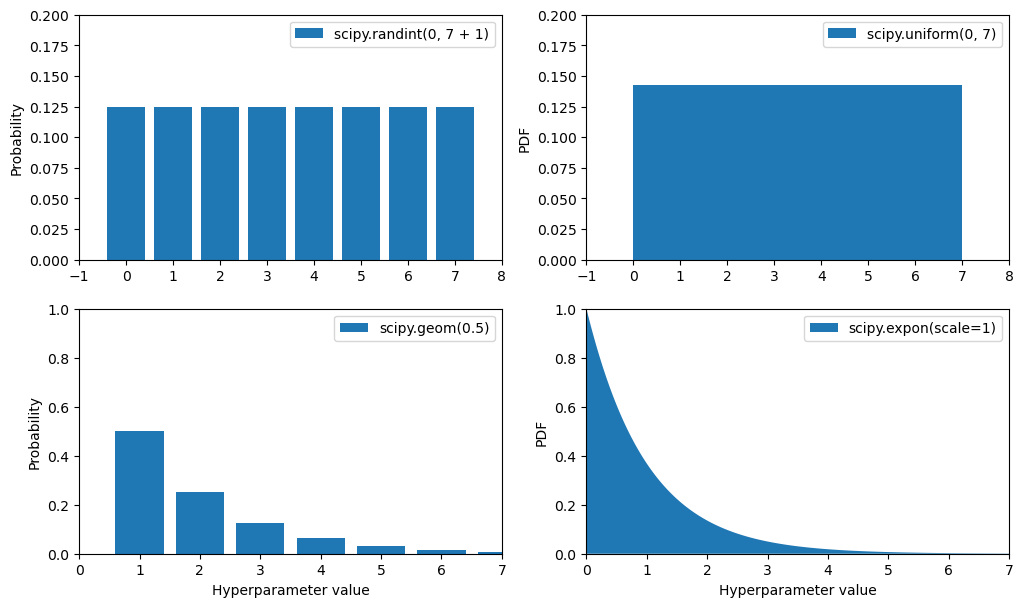

In [115]:
#plots a few distributions you can use in randomized search

from scipy.stats import randint, uniform, geom, expon

xs1 = np.arange(0, 7 + 1)
randint_distrib = randint(0, 7 + 1).pmf(xs1)

xs2 = np.linspace(0, 7, 500)
uniform_distrib = uniform(0, 7).pdf(xs2)

xs3 = np.arange(0, 7 + 1)
geom_distrib = geom(0.5).pmf(xs3)

xs4 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.bar(xs1, randint_distrib, label="scipy.randint(0, 7 + 1)")
plt.ylabel("Probability")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 2)
plt.fill_between(xs2, uniform_distrib, label="scipy.uniform(0, 7)")
plt.ylabel("PDF")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 3)
plt.bar(xs3, geom_distrib, label="scipy.geom(0.5)")
plt.xlabel("Hyperparameter value")
plt.ylabel("Probability")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 4)
plt.fill_between(xs4, expon_distrib, label="scipy.expon(scale=1)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.show()

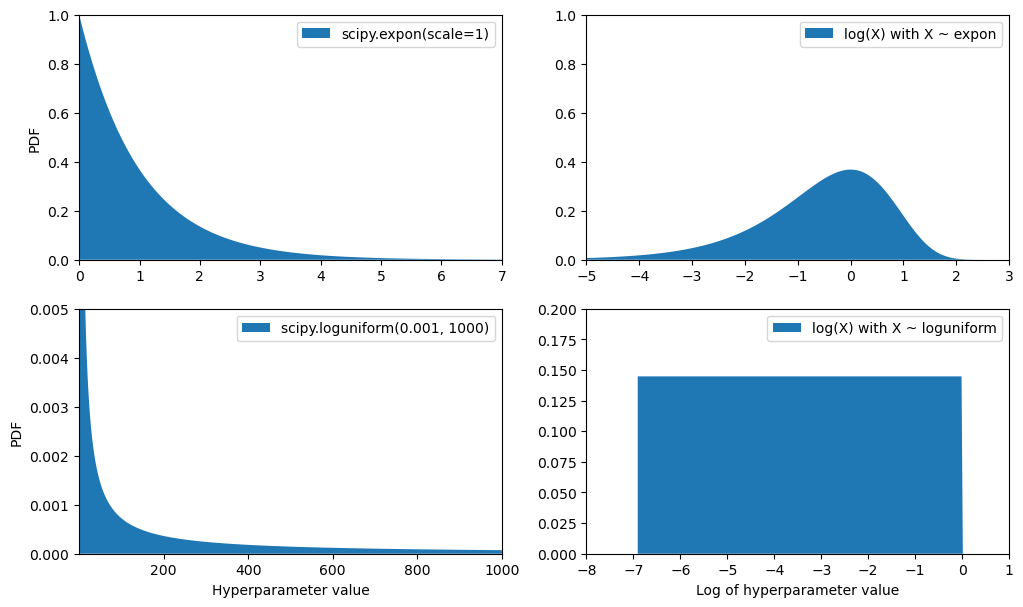

In [116]:
# shows the difference between expon and loguniform

from scipy.stats import loguniform

xs1 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs1)

log_xs2 = np.linspace(-5, 3, 500)
log_expon_distrib = np.exp(log_xs2 - np.exp(log_xs2))

xs3 = np.linspace(0.001, 1000, 500)
loguniform_distrib = loguniform(0.001, 1000).pdf(xs3)

log_xs4 = np.linspace(np.log(0.001), np.log(1000), 500)
log_loguniform_distrib = uniform(np.log(0.001), np.log(1000)).pdf(log_xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.fill_between(xs1, expon_distrib,
                 label="scipy.expon(scale=1)")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 2)
plt.fill_between(log_xs2, log_expon_distrib,
                 label="log(X) with X ~ expon")
plt.legend()
plt.axis([-5, 3, 0, 1])

plt.subplot(2, 2, 3)
plt.fill_between(xs3, loguniform_distrib,
                 label="scipy.loguniform(0.001, 1000)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0.001, 1000, 0, 0.005])

plt.subplot(2, 2, 4)
plt.fill_between(log_xs4, log_loguniform_distrib,
                 label="log(X) with X ~ loguniform")
plt.xlabel("Log of hyperparameter value")
plt.legend()
plt.axis([-8, 1, 0, 0.2])

plt.show()

### Analyzing the Best Models and Their Errors

In [117]:
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.07, 0.05, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.02, 0.01,
       0.01, 0.01, 0.  , 0.01, 0.02, 0.01, 0.02, 0.01, 0.  , 0.01, 0.02,
       0.01, 0.01, 0.01, 0.  , 0.02, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01,
       0.03, 0.01, 0.01, 0.01, 0.01, 0.04, 0.01, 0.02, 0.01, 0.02, 0.01,
       0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.07,
       0.  , 0.  , 0.  , 0.01])

In [118]:
#Let’s sort these importance scores in descending order and display them next to their corresponding attribute names:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(np.float64(0.18599734460509473), 'log__median_income'),
 (np.float64(0.07338850855844488), 'cat__ocean_proximity_INLAND'),
 (np.float64(0.06556941990883974), 'bedrooms__ratio'),
 (np.float64(0.05364871007672531), 'rooms_per_house__ratio'),
 (np.float64(0.04598870861894748), 'people_per_house__ratio'),
 (np.float64(0.04175269214442518), 'geo__Cluster 30 similarity'),
 (np.float64(0.025976797232869678), 'geo__Cluster 25 similarity'),
 (np.float64(0.023595895886342252), 'geo__Cluster 36 similarity'),
 (np.float64(0.02021056221732893), 'geo__Cluster 9 similarity'),
 (np.float64(0.018606917076661445), 'geo__Cluster 34 similarity'),
 (np.float64(0.01813798837462886), 'geo__Cluster 37 similarity'),
 (np.float64(0.017404353166326745), 'geo__Cluster 18 similarity'),
 (np.float64(0.01677838614384489), 'geo__Cluster 1 similarity'),
 (np.float64(0.015459009666188978), 'geo__Cluster 7 similarity'),
 (np.float64(0.015325731028175922), 'geo__Cluster 32 similarity'),
 (np.float64(0.01507377201503834

## Evaluate Your System on the Test Set

In [119]:
# X_test: raw features only
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# final_model: pipeline with preprocessing (including ClusterSimilarity) + regressor
final_predictions = final_model.predict(X_test)  # pipeline handles feature creation

# Compute RMSE manually
import numpy as np
from sklearn.metrics import mean_squared_error

final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
print(final_rmse)

41445.533268606625


 In some cases, such a point estimate of the generalization error will not be
 quite enough to convince you to launch: what if it is just 0.1% better than the
 model currently in production? You might want to have an idea of how
 precise this estimate is. For this, you can compute a 95% confidence interval
 for the generalization error using scipy.stats.t.interval(). You get a fairly large
 interval from 39,275 to 43,467, and your previous point estimate of 41,424 is
 roughly in the middle of it

In [120]:
from scipy import stats

def rmse(squared_errors):
    return np.sqrt(np.mean(squared_errors))

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
boot_result = stats.bootstrap([squared_errors], rmse,
                              confidence_level=confidence, random_state=42)
rmse_lower, rmse_upper = boot_result.confidence_interval

### Model persistence using joblib

In [121]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

Now you can deploy this model to production. For example, the following code could be a script that would run in production:

In [122]:
# excluded for conciseness
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = housing.iloc[:5]  # pretend these are new districts
predictions = final_model_reloaded.predict(new_data)

In [123]:
predictions

array([441046.12, 454713.09, 104832.  , 101316.  , 336181.05])

## Final Conclusion of the Regression Project
In this project, I applied Linear Regression on the California Housing dataset to predict median house values. The process involved data preparation, exploratory analysis, model training, and evaluation.

**Key takeaways:**

* Data preprocessing (handling missing values, feature scaling, and encoding categorical variables) is as important as the model itself.

* Train-test splitting ensures that the model generalizes to unseen data instead of just memorizing patterns.

* Linear Regression provided a simple yet powerful baseline model for regression tasks.

* The evaluation metric RMSE (Root Mean Squared Error) showed that while Linear Regression captures general trends, it struggles with complex, nonlinear relationships.

**This project highlighted the full ML workflow: from raw data → clean dataset → training a model → evaluating → improving.**

### Conclusion:

##### Linear Regression serves as a strong baseline model for regression problems. It helps in understanding the relationships between features and the target variable. However, for better performance on complex data, more advanced models (like Decision Trees, Random Forests, or Gradient Boosting) will be explored in future projects.